In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes as ax
from matplotlib.animation import FuncAnimation

In [2]:
url = 'https://media.geeksforgeeks.org/wp-content/uploads/20240320114716/data_for_lr.csv'
data = pd.read_csv(url)

data = data.dropna()

train_input = np.array(data.x[0:500]).reshape(500, 1)
train_output = np.array(data.y[0:500]).reshape(500, 1)

test_input = np.array(data.x[500:700]).reshape(199, 1)
test_output = np.array(data.y[500:700]).reshape(199, 1)

In [4]:
class LinearRegression:
    def __init__(self):
        self.parameters = {}

    def forward_propagation(self, train_input):
        m = self.parameters['m']
        c = self.parameters['c']
        predictions = np.multiply(m, train_input) + c
        return predictions

    def cost_function(self, predictions, train_output):
        cost = np.mean((train_output - predictions) ** 2)
        return cost

    def backward_propagation(self, train_input, train_output, predictions):
        derivatives = {}
        df = (predictions-train_output)
        dm = 2 * np.mean(np.multiply(train_input, df))
        dc = 2 * np.mean(df)
        derivatives['dm'] = dm
        derivatives['dc'] = dc
        return derivatives

    def update_parameters(self, derivatives, learning_rate):
        self.parameters['m'] = self.parameters['m'] - learning_rate * derivatives['dm']
        self.parameters['c'] = self.parameters['c'] - learning_rate * derivatives['dc']

    def train(self, train_input, train_output, learning_rate, iters):
        self.parameters['m'] = np.random.uniform(0, 1) * -1
        self.parameters['c'] = np.random.uniform(0, 1) * -1

        self.loss = []

        fig, ax = plt.subplots()
        x_vals = np.linspace(min(train_input), max(train_input), 100)
        line, = ax.plot(x_vals, self.parameters['m'] * x_vals + self.parameters['c'], color='red', label='Regression Line')
        ax.scatter(train_input, train_output, marker='o', color='green', label='Training Data')

        ax.set_ylim(0, max(train_output) + 1)

        def update(frame):
            predictions = self.forward_propagation(train_input)
            cost = self.cost_function(predictions, train_output)
            derivatives = self.backward_propagation(train_input, train_output, predictions)
            self.update_parameters(derivatives, learning_rate)
            line.set_ydata(self.parameters['m'] * x_vals + self.parameters['c'])
            self.loss.append(cost)
            print("Iteration = {}, Loss = {}".format(frame + 1, cost))
            return line,

        ani = FuncAnimation(fig, update, frames=iters, interval=200, blit=True)
        ani.save('linear_regression_A.gif', writer='ffmpeg')

        plt.xlabel('Input')
        plt.ylabel('Output')
        plt.title('Linear Regression')
        plt.legend()
        plt.show()

        return self.parameters, self.loss

Iteration = 1, Loss = 8389.280799488557
Iteration = 1, Loss = 1017.9935227215221
Iteration = 1, Loss = 129.67317497617526
Iteration = 1, Loss = 22.620894130840515
Iteration = 2, Loss = 9.719917626106934
Iteration = 3, Loss = 8.165197912612976
Iteration = 4, Loss = 7.977825621138747
Iteration = 5, Loss = 7.955233575573986
Iteration = 6, Loss = 7.9524993440626
Iteration = 7, Loss = 7.952158196423668
Iteration = 8, Loss = 7.952105442607466
Iteration = 9, Loss = 7.9520874445582574
Iteration = 10, Loss = 7.9520736361299456
Iteration = 11, Loss = 7.95206033376917
Iteration = 12, Loss = 7.952047093567544
Iteration = 13, Loss = 7.952033862029158
Iteration = 14, Loss = 7.952020632707054
Iteration = 15, Loss = 7.952007404824184
Iteration = 16, Loss = 7.951994178286794
Iteration = 17, Loss = 7.951980953083461
Iteration = 18, Loss = 7.951967729212691
Iteration = 19, Loss = 7.951954506674185
Iteration = 20, Loss = 7.951941285467792


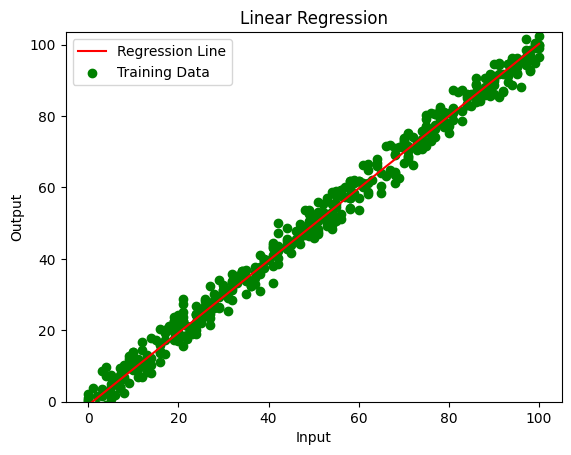

In [5]:
linear_reg = LinearRegression()
parameters, loss = linear_reg.train(train_input, train_output, 0.0001, 20)